In [2]:
# Load Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Prepare/Collect Data
import os

path = os.listdir('Brain Tumor Detection/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Brain Tumor Detection/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [8]:
X.shape

(1222, 200, 200)

# Visualize Data

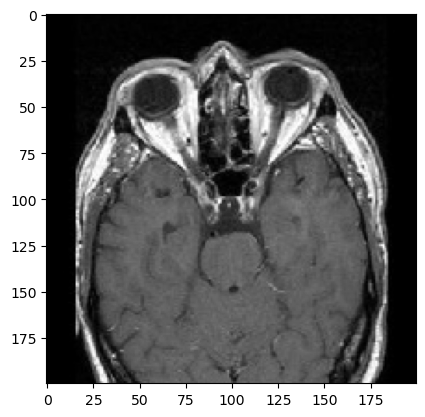

In [9]:
plt.imshow(X[0], cmap='gray')

# Prepare Data

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

# Split Data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

# Feature Scaling

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection: PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [16]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

# Train Model

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [20]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

# Evaluation

In [21]:
print("Training Score: ", lg.score(pca_train, ytrain))
print("Testing Score: ", lg.score(pca_test, ytest))

Training Score:  1.0
Testing Score:  0.9591836734693877


In [22]:
print("Training Score: ", sv.score(pca_train, ytrain))
print("Testing Score: ", sv.score(pca_test, ytest))

Training Score:  0.9938587512794268
Testing Score:  0.963265306122449


# Prediction

In [23]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [29]:
pred[36]

0

In [30]:
ytest[36]

1

# Test Model

In [31]:
dec = {0:'No Tumor', 1:'Positive'}

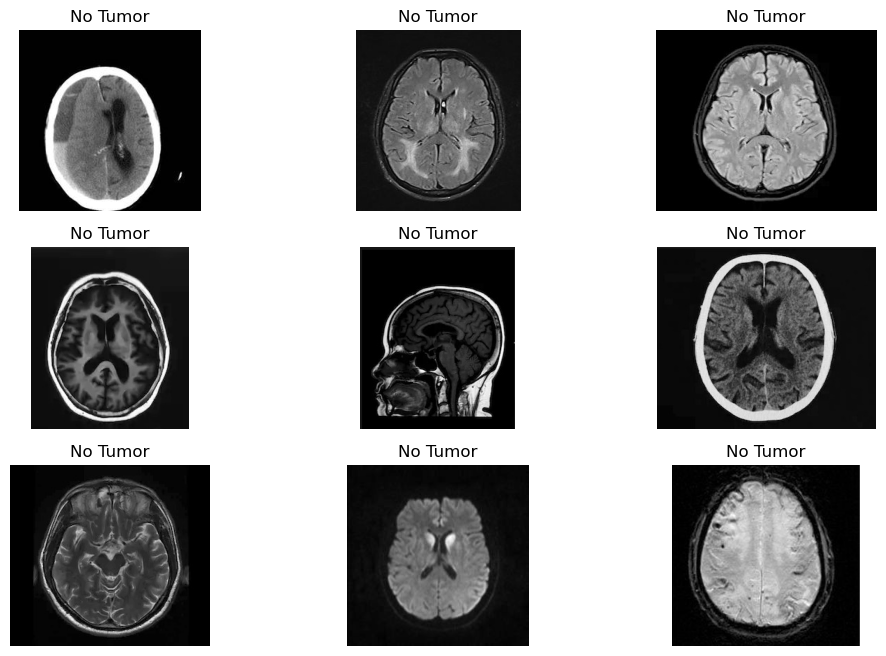

In [35]:
plt.figure(figsize=(12,8))
p = os.listdir('Brain Tumor Detection/Testing')
c = 1
for i in os.listdir('Brain Tumor Detection/Testing/no_tumor')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('Brain Tumor Detection/Testing/no_tumor/'+i, 0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

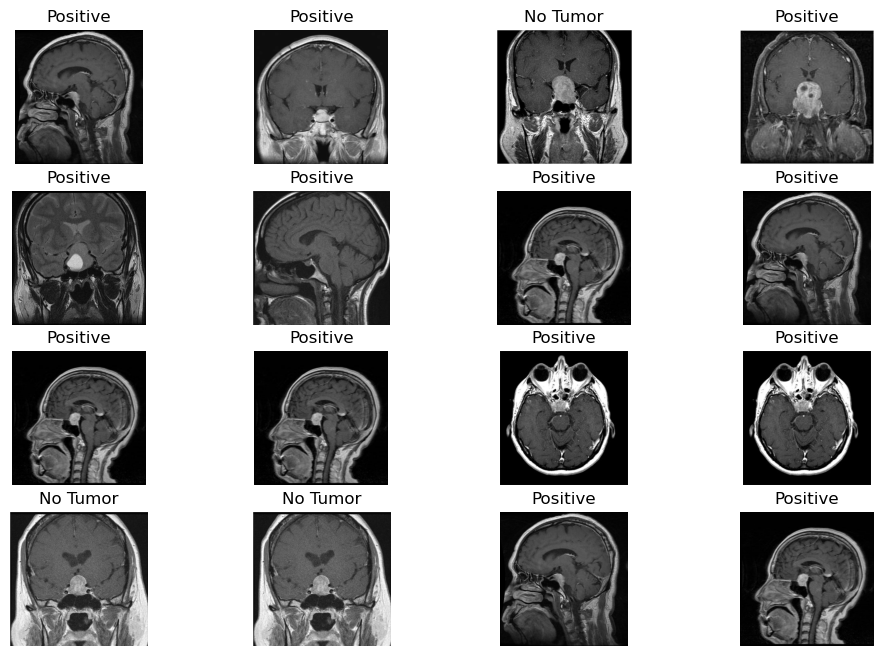

In [38]:
plt.figure(figsize=(12,8))
p = os.listdir('Brain Tumor Detection/Testing')
c = 1
for i in os.listdir('Brain Tumor Detection/Testing/pituitary_tumor')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('Brain Tumor Detection/Testing/pituitary_tumor/'+i, 0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1